<h2>Preparation</h2>

In [1]:
# Import the libraries we need for this lab

# Using the following line code to install the torchvision library
# !conda install -y torchvision

import torch 
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import matplotlib.pylab as plt
import numpy as np

In [2]:
# Display data

def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(data_sample[1].item()))

<h2 id="Makeup_Data">Make Some Data</h2>

In [3]:
# Create and print the training dataset

train_dataset = dsets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
print("Print the training dataset:\n ", train_dataset)

Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Split: train
    Root Location: ./data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None


In [40]:
# Create and print the validating dataset

validation_dataset = dsets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
print("Print the validating dataset:\n ", validation_dataset)

Print the validating dataset:
  Dataset MNIST
    Number of datapoints: 10000
    Split: test
    Root Location: ./data
    Transforms (if any): ToTensor()
    Target Transforms (if any): None


In [4]:
# Print the type of the element

print("Type of data element: ", train_dataset[0][1].type())

Type of data element:  torch.LongTensor


Each element in the rectangular tensor corresponds to a number that represents a pixel intensity as demonstrated by the following image:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.32_image_values.png" width="550" alt="MNIST elements" />

In [30]:
# Print the label

print("The label: ", train_dataset[3][1])

The label:  tensor(1)


The image:  None


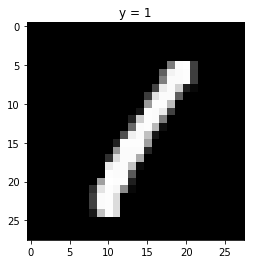

In [32]:
 #Plot the image

print("The image: ", show_data(train_dataset[3]))

The Softmax function requires vector inputs. If you see the vector shape, you'll note it's 28x28.

In [28]:
# Print the shape of the first element in train_dataset

train_dataset[0][0].shape

torch.Size([1, 28, 28])

Flatten the tensor as shown in this image:

<img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.3.2Imagetovector2.png" width="550" alt="Flattern Image" />

<h3>Practice</h3>

In [33]:
# Set input size and output size

input_dim = 28 * 28
output_dim = 10

In [34]:
# Practice: Create a softmax classifier by using sequenital
model = nn.Sequential(nn.Linear(input_dim, output_dim))

<h2 id="Model">Define the Softmax Classifier, Criterion function, Optimizer, and Train the Model</h2> 

View the size of the model parameters:

In [37]:
# Print the parameters

print('W: ', list(model.parameters())[0].size())
print('b: ', list(model.parameters())[1].size())

W:  torch.Size([10, 784])
b:  torch.Size([10])


Cover the model parameters for each class to a rectangular grid: 

<a>     <img src = "https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0110EN/notebook_images%20/chapter3/3.3.2paramaters_to_image.gif" width = 550, align = "center"></a> 

In [49]:
# Define the learning rate, optimizer, criterion and data loader

learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

In [53]:
# Train the model

n_epochs = 10
loss_list = []
accuracy_list = []
N_test = len(validation_dataset)

def train_model(n_epochs):
    for epoch in range(n_epochs):
        for x, y in train_loader:
            optimizer.zero_grad()
            z = model(x.view(-1, 28 * 28))
            loss = criterion(z, y)
            loss.backward()
            optimizer.step()
        correct = 0
        
        #perform a prediction on the validation  data  
        for x_test, y_test in validation_loader:
            z = model(x_test.view(-1, 28 * 28))
            _, yhat = torch.max(z.data, 1)
            correct += (yhat == y_test).sum().item()
        accuracy = correct / N_test
        loss_list.append(loss.data)
        accuracy_list.append(accuracy)
        
train_model(n_epochs)

<h2 id="Result">Analyze Results</h2> 

In [ ]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list, color = color)
ax1.set_xlabel('epoch', color = color)
ax1.set_ylabel('total loss', color = color)
ax1.tick_params(axis = 'y', color = color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color = color)  
ax2.plot( accuracy_list, color = color)
ax2.tick_params(axis = 'y', color = color)
fig.tight_layout()

In [ ]:
# Plot the misclassified samples

count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat: ",yhat)
        count += 1
    if count >= 5:
        break